In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [72]:
df=pd.read_csv("Iris.csv")
print('Your Data is Ready ')

Your Data is Ready 


In [73]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df['Sprecies'] = le.fit_transform(df['Species'])

In [74]:
df.shape

(150, 6)

In [75]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
data = df.drop(['Id'], axis=1)

In [54]:
df.shape

(150, 5)

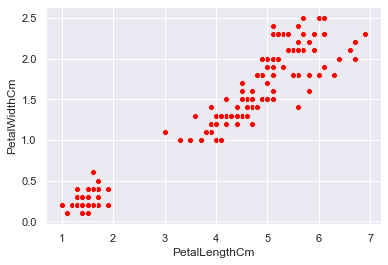

In [76]:
sns.scatterplot(y= 'PetalWidthCm', x= 'PetalLengthCm', data=df,color='red')

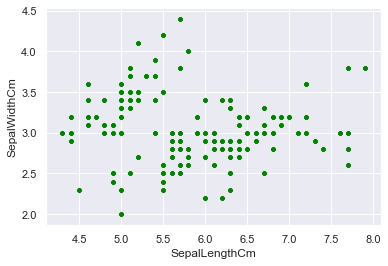

In [77]:
sns.scatterplot(x= 'SepalLengthCm', y= 'SepalWidthCm', data=df,color='green')


In [79]:
X = df.drop('Species', axis=1)
y = df['Species']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
predictions = dtree.predict(X_test)


In [82]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [83]:
print(confusion_matrix(y_test,predictions))

[[ 5  0  0]
 [ 0 12  0]
 [ 0  0 13]]


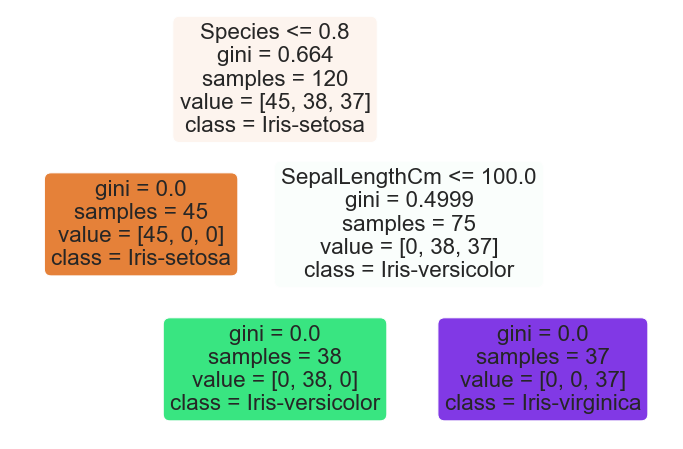

In [85]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
dec_tree = plot_tree(dtree, feature_names = data.columns, class_names=data["Species"].unique().tolist(), filled = True, precision=4, rounded=True);